# Final Project Submission


* Student name: Bradly Horn and Victor Chen
* Student pace: full time
* Scheduled project review date/time: June 4th, 2021
* Instructor name: Max Barry

## Business Understanding:

Our client is a house flipping company and they are wanting to get in the martel in king county. Being that they are not from king county they need some help to understand the market. They want to know out of all the feathers for the house in king county which features have the most  significant effect on the price of a house.They also want to know which feathers affect the house’s price the most, both positively and negatively.

Business Questions:

1. What features affect the price significantly?
2. How do they affect the price, positive and negative ?


## Data Understanding

### Imports and Opening CSV

First, let's take a look at the data we have available to us:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# import geopandas as gpd
# from shapely.geometry import Point,Polygon
# import descartes

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Interpretation:

This data set is a record of house sales in King County, Washington, between 2014 and 2015. It includes information like the number of bedrooms, square footage (important!), condition, the year it was built, the year it was renovated (if applicable), and the zipcode and latitude/longitude. From this data, we can extrapolate location, age of the house, and size of the house, giving us a good look at how these factors affect the price. 


Target: Price

Available Predictors: bedrooms, bathrooms, square footage of living space, square footage of the lot, numuber of floors, waterfront house or not, number of viewers, condition based on a numeric scale, grade based on a numeric scale, square footage of the basement, year the house was built, year the house was renovated, zipcode, latitude/longitude, and square footage of living space of the nearest 15 neighbors

In [20]:
df.shape

(21597, 21)

We have 21,597 entries, with 21 columns of predictors

## Data Preparation:

### Imports and Opening CSV

Here, we see that there are some null values that need cleaning, as well as a couple of columns that are in string form rather than integer or float form like we prefer.

### Start of Data Cleaning
To do list: 

'date' needs to be changed from string to datetime 

'waterfront'   needs null values filled

'view'        

'yr_renovated' 

'sqft_basement' needs to be changed from string to float 

In [5]:
# instantiating a copy of the original data set which we will use to clean, and later on for modeling
df_clean = df.copy()

In [6]:
# changing 'date' column to datetime
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [7]:
# examining the 'waterfront' null entries
df_clean['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
# i assume here that na means 0
df_clean['waterfront'].fillna(0, inplace=True)
df_clean['waterfront'].isna().sum()

0

In [9]:
# examining the 'view' null entries
df_clean['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [10]:
# i assume here that na means 0
df_clean['view'].fillna(0, inplace=True)
df_clean['view'].isna().sum()

0

In [11]:
# examining 'yr_renovated' null entries
df_clean['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
# i assume here that na means 0
df_clean['yr_renovated'].fillna(0, inplace=True)
df_clean['yr_renovated'].isna().sum()

0

In [13]:
# examining 'sqft_basement' string values
df_clean['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1284.0        1
2180.0        1
2120.0        1
2850.0        1
1960.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [14]:
# replacing strings with floats
df_clean['sqft_basement'].replace(to_replace = '?', value = 0.0, inplace = True)

In [15]:
df_clean['sqft_basement'] = df_clean['sqft_basement'].astype(float)

In [16]:
df_clean['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [17]:
# checking to make sure we cleaned all the columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [18]:
# save the cleaned csv back into our data folder
df_clean.to_csv('data/kc_house_data_clean.csv', index=False)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Modeling

### FSM
First Simple Model

Just a quick first model based on the correlations we see above. Working with **price** and **sqft_living**, as they are highly correlated (both logically and looking at the correlation table below)

In [18]:
# look at correlations to find a starting point for our FSM
df_clean.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


Null Hypothesis: Square footage does not affect price

Alternate Hypothesis: Square footage does affect price

alpha = 0.05

In [19]:
# start of fsm (first simple model)
# in this case it seems like it will be sqft_living

formula = 'price ~ sqft_living'
df_fsm = ols(formula, df_clean).fit()
df_fsm_summ = df_fsm.summary()
df_fsm_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:49:55   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We reject the null hypothesis that square footage does not affect price. The p-value is 0, which is less than alpha of 0.05

Let's take a quick look at the QQ-Plot at this point, with just the basic linear regression model

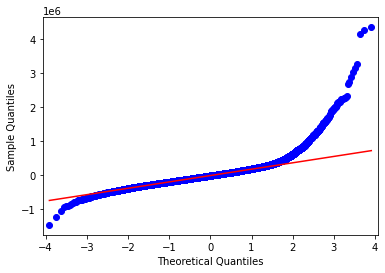

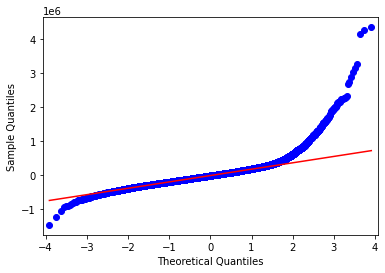

In [20]:
qqplot(df_fsm.resid, line = 'q')

As we can see here, the model actually does predict relatively well, especially among the more central quantiles. However, when the prices get high, the variance starts to increase dramatically. 

### Features
Starting from this point, we ask questions about what we want to glean from the model and state null and alternate hypotheses for each. We want to find whether or not each question we ask, relating to price, can be answered in a statistically significant way. 

#### Bedrooms

Question: Does the condition of the house affect housing price? House condition is a factor that can easily be upgraded by house flippers. 


Hypothesis Testing: 
- Null: The 'condition' of the house has no relationship with the price of the house
- Alternative: The 'condition' of the house does have a relationship with the price of the house

In [21]:
formula = 'price ~ sqft_living + bedrooms'
model = ols(formula, df_clean).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:49:56   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.091e+04   6638.826     12.187      0.000    6.79e+04    9.39e+04
sqft_living   314.6011      2.344    134.232      0.000     310.007     319.195
bedrooms    -5.783e+04   2322.987    -24.896      0.000   -6.24e+04   -5.33e+04
==============================================================================
Omnibus:                    14391.571   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488612.629
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      25.654   Cond. No.                     8.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Sqft_lot

In [22]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot'
second_model = ols(formula, df_clean).fit()
second_model_summary = second_model.summary()
second_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7451.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:49:56   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.994e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.424e+04   6637.291     12.692      0.000    7.12e+04    9.72e+04
sqft_living   318.6333      2.383    133.727      0.000     313.963     323.304
bedrooms    -5.959e+04   2327.075    -25.605      0.000   -6.41e+04    -5.5e+04
sqft_lot       -0.3847      0.043     -8.922      0.000      -0.469      -0.300
==============================================================================
Omnibus:                    14308.034   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           477721.465
Skew:                           2.710   Prob(JB):                         0.00
Kurtosis:                      25.394   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have to come back to this to finish it; condition is a categorical variable that requires dummy variables

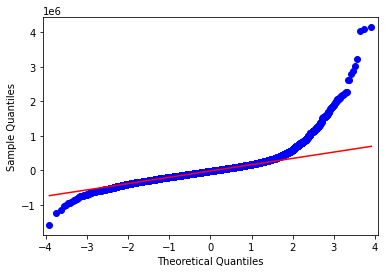

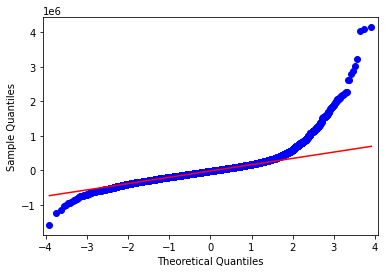

In [23]:
qqplot(second_model.resid, line = 'q')

### Floors
Next up we add in the feature 'view', which is a number based on the amount of people who visit

It seems to be a categorical variable, with values between 0 and 4. Might need to separate it into dummy variables

In [24]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot + floors'
third_model = ols(formula, df_clean).fit()
third_model_summary = third_model.summary()
third_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     5588.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:49:57   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.994e+05
Df Residuals:                   21592   BIC:                         5.995e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.295e+04   7699.144     10.773      0.000    6.79e+04     9.8e+04
sqft_living   318.3662      2.516    126.560      0.000     313.436     323.297
bedrooms    -5.955e+04   2329.114    -25.569      0.000   -6.41e+04    -5.5e+04
sqft_lot       -0.3836      0.043     -8.871      0.000      -0.468      -0.299
floors       1153.7566   3483.946      0.331      0.741   -5675.036    7982.549
==============================================================================
Omnibus:                    14316.176   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           478692.091
Skew:                           2.712   Prob(JB):                         0.00
Kurtosis:                      25.417   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Waterfront

In [25]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot + floors + waterfront'
fourth_model = ols(formula, df_clean).fit()
fourth_model_summary = fourth_model.summary()
fourth_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     5115.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:49:57   Log-Likelihood:            -2.9895e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21591   BIC:                         5.980e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.543e+04   7434.070     10.146      0.000    6.09e+04       9e+04
sqft_living   305.9142      2.448    124.953      0.000     301.115     310.713
bedrooms    -5.256e+04   2255.063    -23.306      0.000    -5.7e+04   -4.81e+04
sqft_lot       -0.3758      0.042     -9.004      0.000      -0.458      -0.294
floors       3901.4835   3363.620      1.160      0.246   -2691.460    1.05e+04
waterfront   8.286e+05   2.08e+04     39.790      0.000    7.88e+05    8.69e+05
==============================================================================
Omnibus:                    13038.313   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389835.187
Skew:                           2.394   Prob(JB):                         0.00
Kurtosis:                      23.256   Cond. No.                     5.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

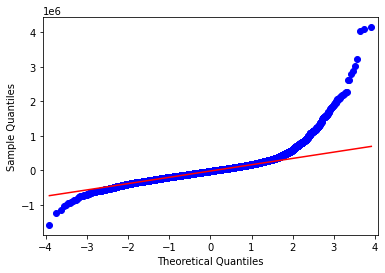

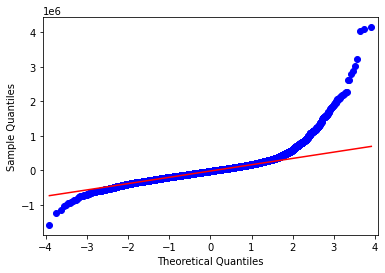

In [26]:
qqplot(third_model.resid, line = 'q')

We don't want to use this due to the strong correlation with sqft_living. 

### Yr_built

In [27]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot + floors + waterfront + yr_built'
fifth_model = ols(formula, df_clean).fit()
fifth_model_summary = fifth_model.summary()
fifth_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     4954.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:49:57   Log-Likelihood:            -2.9804e+05
No. Observations:               21597   AIC:                         5.961e+05
Df Residuals:                   21590   BIC:                         5.962e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.49e+06   1.24e+05     44.112      0.000    5.25e+06    5.73e+06
sqft_living   322.3601      2.377    135.594      0.000     317.700     327.020
bedrooms    -5.502e+04   2162.773    -25.440      0.000   -5.93e+04   -5.08e+04
sqft_lot       -0.3253      0.040     -8.126      0.000      -0.404      -0.247
floors       6.977e+04   3561.550     19.591      0.000    6.28e+04    7.68e+04
waterfront    7.75e+05      2e+04     38.745      0.000    7.36e+05    8.14e+05
yr_built    -2810.4796     64.493    -43.578      0.000   -2936.891   -2684.068
==============================================================================
Omnibus:                    12919.002   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           417746.796
Skew:                           2.335   Prob(JB):                         0.00
Kurtosis:                      24.034   Cond. No.                     3.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

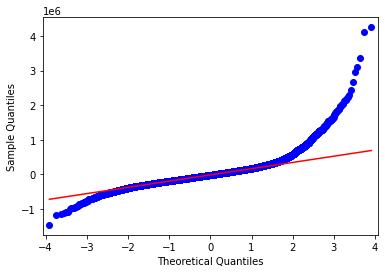

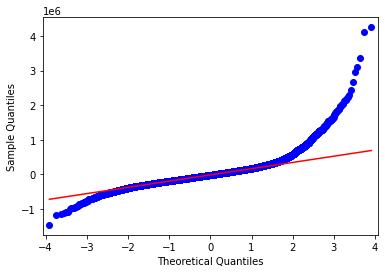

In [28]:
qqplot(fourth_model.resid, line = 'q')

### Bedrooms

In [29]:
formula = 'price ~ sqft_living + grade + bathrooms + bedrooms'
fifth_model = ols(formula, df_clean).fit()
fifth_model_summ = fifth_model.summary()
fifth_model_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6429.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:49:58   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.813e+05    1.5e+04    -32.145      0.000   -5.11e+05   -4.52e+05
sqft_living   226.9304      3.592     63.177      0.000     219.890     233.971
grade        9.674e+04   2323.206     41.640      0.000    9.22e+04    1.01e+05
bathrooms   -2.722e+04   3491.838     -7.794      0.000   -3.41e+04   -2.04e+04
bedrooms    -3.965e+04   2304.000    -17.210      0.000   -4.42e+04   -3.51e+04
==============================================================================
Omnibus:                    16463.655   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894495.760
Skew:                           3.179   Prob(JB):                         0.00
Kurtosis:                      33.880   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

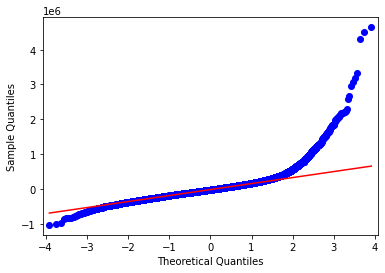

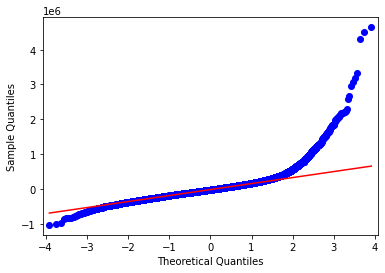

In [30]:
qqplot(fifth_model.resid, line = 'q')

As we can see from each iteration, we are increasing our R-Squared while maintaining a low p-value. 

### Zipcodes

In [31]:
dummy = pd.get_dummies(df['zipcode'], prefix='zipcode', drop_first=True)
df_dummy = pd.concat([df, dummy], axis=1)
dummy_formula = ''
dummy_formula = ' + '.join(df_dummy.columns[-((len(df['zipcode'].value_counts())-1)):])

In [34]:
formula = 'price ~ sqft_living + bedrooms + sqft_lot + floors + waterfront + yr_built + ' + dummy_formula
sixth_model = ols(formula, df_dummy).fit()
sixth_summary = sixth_model.summary()

sixth_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     898.2
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:50:32   Log-Likelihood:            -2.5933e+05
No. Observations:               19221   AIC:                         5.188e+05
Df Residuals:                   19145   BIC:                         5.194e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.875e+05   1.19e+05      6.602      0.000    5.54e+05    1.02e+06
sqft_living     269.0671      1.983    135.713      0.000     265.181     272.953
bedrooms      -3.801e+04   1715.345    -22.161      0.000   -4.14e+04   -3.47e+04
sqft_lot          0.2440      0.034      7.120      0.000       0.177       0.311
floors          770.2738   3110.281      0.248      0.804   -5326.150    6866.698
waterfront     8.683e+05   1.51e+04     57.586      0.000    8.39e+05    8.98e+05
yr_built       -452.3494     61.090     -7.405      0.000    -572.090    -332.609
zipcode_98002  2.326e+04   1.63e+04      1.425      0.154   -8728.984    5.53e+04
zipcode_98003  8076.9586   1.47e+04      0.551      0.582   -2.06e+04    3.68e+04
zipcode_98004  8.217e+05   1.44e+04     57.222      0.000    7.94e+05     8.5e+05
zipcode_98005  3.392e+05   1.71e+04     19.881      0.000    3.06e+05    3.73e+05
zipcode_98006  3.294e+05   1.29e+04     25.479      0.000    3.04e+05    3.55e+05
zipcode_98007  2.779e+05   1.87e+04     14.876      0.000    2.41e+05    3.15e+05
zipcode_98008  2.868e+05   1.47e+04     19.534      0.000    2.58e+05    3.16e+05
zipcode_98010  6.041e+04   2.12e+04      2.847      0.004    1.88e+04    1.02e+05
zipcode_98011  1.242e+05   1.64e+04      7.559      0.000     9.2e+04    1.56e+05
zipcode_98014  7.649e+04   1.96e+04      3.905      0.000    3.81e+04    1.15e+05
zipcode_98019  6.934e+04   1.67e+04      4.147      0.000    3.66e+04    1.02e+05
zipcode_98022  2.786e+04   1.57e+04      1.779      0.075   -2838.810    5.86e+04
zipcode_98023  -1.91e+04   1.28e+04     -1.496      0.135   -4.41e+04    5920.609
zipcode_98024  1.419e+05   2.29e+04      6.208      0.000    9.71e+04    1.87e+05
zipcode_98027  1.733e+05   1.33e+04     13.001      0.000    1.47e+05    1.99e+05
zipcode_98028  1.261e+05   1.47e+04      8.605      0.000    9.74e+04    1.55e+05
zipcode_98029  2.395e+05   1.42e+04     16.899      0.000    2.12e+05    2.67e+05
zipcode_98030  6584.3427    1.5e+04      0.439      0.661   -2.28e+04     3.6e+04
zipcode_98031  2.142e+04   1.48e+04      1.444      0.149   -7659.829    5.05e+04
zipcode_98032  1.133e+04    1.9e+04      0.595      0.552    -2.6e+04    4.86e+04
zipcode_98033  3.945e+05   1.33e+04     29.694      0.000    3.68e+05    4.21e+05
zipcode_98034  2.185e+05   1.26e+04     17.405      0.000    1.94e+05    2.43e+05
zipcode_98038  3.008e+04   1.24e+04      2.431      0.015    5822.112    5.43e+04
zipcode_98039   1.38e+06   2.81e+04     49.121      0.000    1.32e+06    1.43e+06
zipcode_98040  5.766e+05    1.5e+04     38.561      0.000    5.47e+05    6.06e+05
zipcode_98042  1.329e+04   1.25e+04      1.059      0.289   -1.13e+04    3.79e+04
zipcode_98045  1.077e+05   1.61e+04      6.697      0.000    7.62e+04    1.39e+05
zipcode_98052  2.494e+05   1.25e+04     20.012   

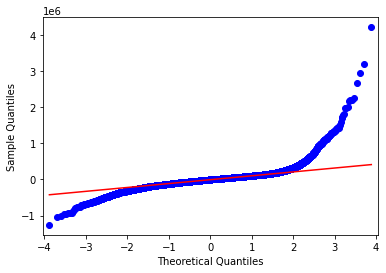

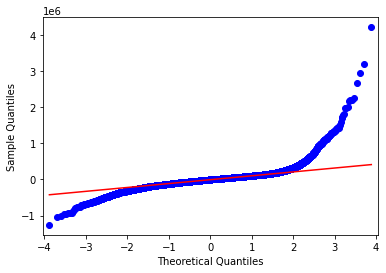

In [35]:
qqplot(sixth_model.resid, line = 'q')

(array([1.9053e+04, 2.1180e+03, 2.9800e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <BarContainer object of 10 artists>)

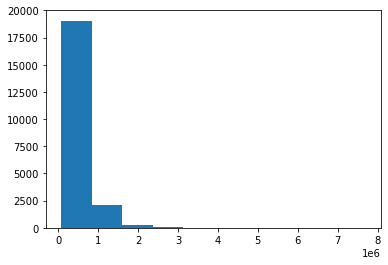

In [36]:
fig, ax = plt.subplots()

ax.hist(x = df_clean['price'])

## Conclusion

Overall we found that sqft living and lot, number of bedrooms, number of floors, waterfront view, the year the house was built, and it's zip code location has the most significant impact on the price of a house. With our final model set and dont we can see how these features affect the price of a house, namly which top one affects positively/negatively. Having a house with a waterfront alone immediately increases a house by \\$8.6 hundred thousand. While each new year decreases the overall price of a house by \\$450.


Zip Code Deep Dive: 
Highest: 98039
Lowest: 98038